In [1]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import glob


In [2]:
file = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/Non-AMD/" 

img_file = list(glob.glob1(file, "*.jpg"))
img = []
for i in img_file:
    img.append(i)

data = []
for i in img:
    image_path = file + i
    gray=Image.open(image_path)
    gray_resiz = gray.resize((256, 256))
    arr_gray = np.array(gray_resiz)
    data.append(arr_gray)


In [3]:
d = np.array(data)


In [4]:
d.shape

(311, 256, 256, 3)

In [5]:
file1 = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/AMD/" 

img_file1 = list(glob.glob1(file1, "*.jpg"))
img1 = []
for i in img_file1:
    img1.append(i)

data1 = []
for i in img1:
    image_path1 = file1 + i
    gray1=Image.open(image_path1)
    gray_resiz1 = gray1.resize((256, 256))
    arr_gray1 = np.array(gray_resiz1)
    data1.append(arr_gray1)


In [6]:
d1 = np.array(data1)


In [7]:
d1.shape

(89, 256, 256, 3)

In [8]:
df = np.concatenate((d, d1), axis = 0)
df.shape

(400, 256, 256, 3)

In [9]:
d_label = [0]*311
d1_label = [1]*89

In [10]:
y = np.concatenate([d_label, d1_label])


In [11]:
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import np_utils

In [12]:
# # #Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)

# x_train = pd.concat([df.iloc[:135, :100], df.iloc[168:303,:100]], axis = 0, ignore_index = True).values
# x_test =pd.concat([df.iloc[135:168, :100], df.iloc[303:,:100]], axis = 0, ignore_index = True).values
# y_train = pd.concat([df.iloc[:135, 100], df.iloc[168:303,100]], axis = 0, ignore_index = True).values
# y_test = pd.concat([df.iloc[135:168, 100], df.iloc[303:, 100]], axis = 0, ignore_index = True).values


In [13]:
import keras
y_train = keras.utils.np_utils.to_categorical(y_train,2)
y_test = keras.utils.np_utils.to_categorical(y_test,2)


In [14]:
y_train.shape

(320, 2)

In [15]:
# Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.applications import Xception
model_cnn = tf.keras.models.Sequential([
    Xception(input_shape=(256,256,3), include_top=False),
])
for layer in model_cnn.layers:
  layer.trainable = False

model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(2, activation='sigmoid'))

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 64)          1179712   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 64)                36928     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

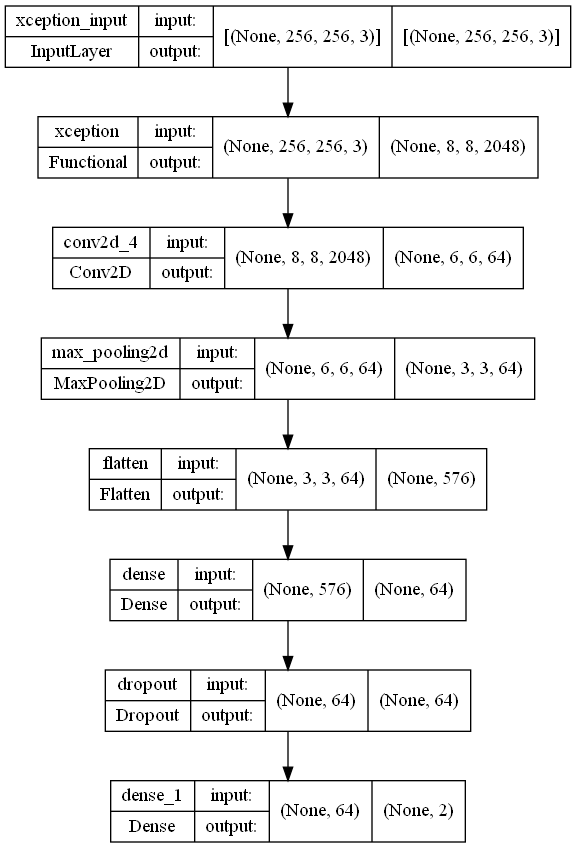

In [16]:
from tensorflow.keras.utils import plot_model

#model = Model(inputs=[mlp.input, model_cnn.input], outputs=x)

plot_model(model_cnn, "multi_input_and_output_model.png", show_shapes=True)

In [17]:

loss = keras.losses.BinaryCrossentropy()
model_cnn.compile(loss= loss, optimizer= 'adam', metrics=['accuracy','Precision','Recall','AUC'])
# train the model
print("[INFO] training model...")

h = model_cnn.fit(x=x_train, y=y_train, epochs=50, batch_size=32)

[INFO] training model...
Epoch 1/50
10/10 [==============================] - 196s 15s/step - loss: 15.1744 - accuracy: 0.6344 - precision: 0.5927 - recall: 0.6094 - auc: 0.6201
Epoch 2/50
10/10 [==============================] - 151s 15s/step - loss: 2.9905 - accuracy: 0.7219 - precision: 0.6789 - recall: 0.6938 - auc: 0.7203
Epoch 3/50
10/10 [==============================] - 151s 15s/step - loss: 1.1314 - accuracy: 0.7625 - precision: 0.7331 - recall: 0.7125 - auc: 0.7909
Epoch 4/50
10/10 [==============================] - 151s 15s/step - loss: 0.7234 - accuracy: 0.7531 - precision: 0.7273 - recall: 0.8000 - auc: 0.8417
Epoch 5/50
10/10 [==============================] - 152s 15s/step - loss: 0.4538 - accuracy: 0.8188 - precision: 0.7975 - recall: 0.7875 - auc: 0.8707
Epoch 6/50
10/10 [==============================] - 151s 15s/step - loss: 0.4747 - accuracy: 0.8156 - precision: 0.8185 - recall: 0.7469 - auc: 0.8783
Epoch 7/50
10/10 [==============================] - 154s 15s/step - 

In [18]:
score = model_cnn.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])


3/3 [==============================] - 26s 6s/step - loss: 0.6875 - accuracy: 0.9000 - precision: 0.8987 - recall: 0.8875 - auc: 0.9471
loss= 0.6875386238098145
accuracy= 0.8999999761581421
